In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime


In [2]:
timestamp = datetime.now().strftime("%Y%m%d%H%M%S")

In [3]:
scatter_alpha = 0.01

In [4]:
default_figsize = (12, 2)

In [5]:
new_centrality_columns =  ['c_K','c_B','c_C','DNI_SIR']
original_centrality_columns = ['coreness','btwn','clos','SIR']

In [6]:
original_model_columns = ['mp2v_2hops', 'mp2v_4hops', 'mp2v_6hops', 'transE', 'distmult', 'complEx']
new_model_columns = ['mp2v 2hops', 'mp2v 4hops', 'mp2v 6hops', 'TransE', 'DistMult', 'ComplEx']

In [7]:
original_method_columns = [
    'mahe_mp2v_2hops', 
    'mahe_mp2v_4hops', 
    'mahe_mp2v_6hops', 
    'mahe_transE', 
    'mahe_distmult', 
    'mahe_complEx',
    'nlc_mp2v_2hops', 
    'nlc_mp2v_4hops', 
    'nlc_mp2v_6hops', 
    'nlc_transE', 
    'nlc_distmult', 
    'nlc_complEx',
]
new_method_columns = [
    'MAHE_mp2v_2hops', 
    'MAHE_mp2v_4hops', 
    'MAHE_mp2v_6hops', 
    'MAHE_TransE', 
    'MAHE_DistMult', 
    'MAHE_ComplEx',
    'NLC_mp2v_2hops', 
    'NLC_mp2v_4hops', 
    'NLC_mp2v_6hops', 
    'NLC_TransE', 
    'NLC_DistMult', 
    'NLC_ComplEx',
]

In [8]:
measures = {}
rankings = {}
figs = {}
axs = {}
corr = {}
sims = {}

## DBLP

### Measures

In [9]:
measures['dblp'] = pd.read_csv('results/exp/20250506100826/dblp/20250506101042_df_measures_results.csv', index_col=0).dropna()
# measures.loc[:, 'SIR'] = measures.dropna()['SIR'].apply(lambda x: eval(re.findall(r"\((\d+.\d+),", x)[0]))
measures['dblp'].rename(columns=dict(zip(original_centrality_columns, new_centrality_columns)), inplace=True)
measures['dblp'].rename(columns=dict(zip(original_method_columns, new_method_columns)), inplace=True)
measures['dblp']

,mp2v_2hops,mp2v_4hops,mp2v_6hops,transE,distmult,complEx,NLC_mp2v_2hops,NLC_mp2v_4hops,NLC_mp2v_6hops,NLC_TransE,...,MAHE_mp2v_6hops,MAHE_TransE,MAHE_DistMult,MAHE_ComplEx,DNI_SIR,eig,deg,c_B,c_C,c_K
0,2124.338135,2616.317139,1968.127197,2043.422974,1728.609863,1625.330688,0.004350,0.358626,0.141425,0.000170,...,196.339600,-15059.346680,184.071228,3496.177979,188.601,3.886847e-04,0.000217,0.000019,0.164442,4.0
1,2741.660645,2298.967285,1607.465576,2366.074219,1716.300171,1566.842407,2.112587,1.474117,0.383984,0.001578,...,71.962463,-15701.248047,133.788330,4397.770508,425.416,3.913684e-04,0.001087,0.000217,0.171852,4.0
2,2886.001953,2589.236816,2027.296509,1905.423584,1669.649658,1920.683228,0.759099,0.527581,0.151071,0.000172,...,-466.064209,-23759.406250,41.288025,5131.075195,358.083,5.768787e-07,0.000326,0.000065,0.167764,4.0
3,2268.839844,2052.374268,1695.787231,2463.795654,1067.719727,1204.877319,1.991118,3.500876,2.309418,0.007513,...,141.380310,-15303.677734,135.714050,4441.963379,1516.406,3.178995e-03,0.003586,0.001494,0.179934,6.0
4,2964.036621,2701.411377,2401.768555,1631.012085,1848.418213,1959.698242,0.028860,0.067896,0.124928,0.000151,...,-505.054260,-9588.461914,68.450897,4938.616699,167.095,1.195049e-07,0.000109,0.000000,0.164881,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,2903.752930,2553.106934,2357.226807,2053.708740,1789.609863,1914.628174,0.204792,0.131031,0.096646,0.000199,...,-112.641724,-18851.447266,-394.006897,4564.452637,168.868,1.960439e-07,0.000109,0.000000,0.162709,2.0
4053,2917.285156,2691.000000,2597.012451,1708.970703,1974.682251,1675.692383,0.670940,0.100369,0.153103,0.000092,...,-281.069031,-12675.548828,-342.606934,4122.842773,198.003,1.960439e-07,0.000109,0.000000,0.162709,2.0
4054,2070.896729,2654.137207,2502.867676,2064.230469,2113.696289,1846.525391,0.000752,0.035305,0.112089,0.000044,...,-415.243103,-12354.019531,401.777618,4853.122559,210.044,1.961518e-07,0.000109,0.000000,0.162712,2.0
4055,2767.153320,2804.956543,2041.143311,1839.335205,2106.008789,1944.421387,0.004118,0.061617,0.039091,0.000031,...,-32.606567,-12475.589844,-275.282654,5775.374512,206.675,1.961518e-07,0.000109,0.000000,0.162712,2.0


In [10]:
corr['dblp_pearson'] = {
    'cent': measures['dblp'].corr(method='pearson').round(3).loc[new_centrality_columns, new_method_columns],
    'repr': measures['dblp'].corr(method='pearson').round(3).loc[new_method_columns, new_method_columns]
}

<Axes: >

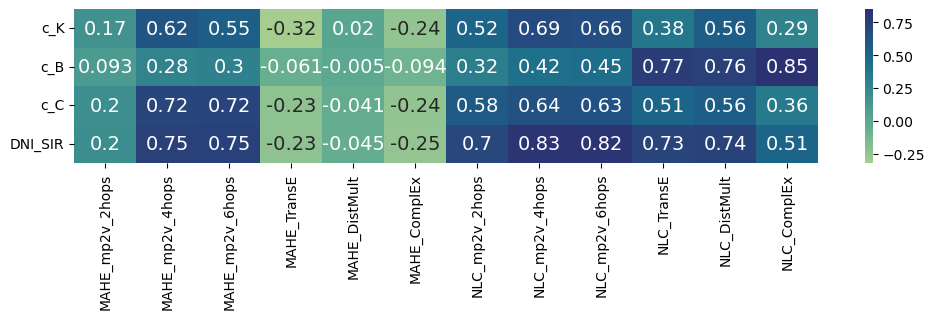

In [11]:
figs['dblp_pearson_cent'], axs['dblp_pearson_cent'] = plt.subplots(figsize=default_figsize)
#ax.set_title("DBLP Pearson correlation between values (centrality vs embeddings)")
sns.heatmap(
    corr['dblp_pearson']['cent'], 
    annot=True, 
    ax=axs['dblp_pearson_cent'], cmap="crest",
    annot_kws={'size': 14}
)
# fig.savefig('dblp_pearson.png')

<Axes: >

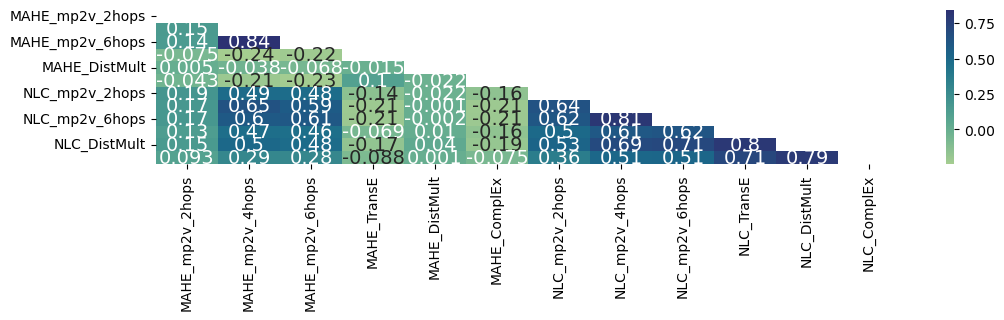

In [12]:
figs['dblp_pearson_repr'], axs['dblp_pearson_repr'] = plt.subplots(figsize=default_figsize)
sns.heatmap(
    corr['dblp_pearson']['repr'], 
    annot=True, 
    ax=axs['dblp_pearson_repr'], cmap="crest",
    annot_kws={'size': 14},
    mask=np.triu(corr['dblp_pearson']['repr'])
)

### Rankings

In [13]:
rankings['dblp'] = pd.read_csv('results/exp/20250506100826/dblp/20250506101043_df_rank_results.csv', index_col=0).dropna()
rankings['dblp'].rename(columns=dict(zip(original_centrality_columns, new_centrality_columns)), inplace=True)
rankings['dblp'].rename(columns=dict(zip(original_method_columns, new_method_columns)), inplace=True)
rankings['dblp']

,mp2v_2hops,mp2v_4hops,mp2v_6hops,transE,distmult,complEx,NLC_mp2v_2hops,NLC_mp2v_4hops,NLC_mp2v_6hops,NLC_TransE,...,MAHE_mp2v_6hops,MAHE_TransE,MAHE_DistMult,MAHE_ComplEx,DNI_SIR,eig,deg,c_B,c_C,c_K
0,3.0,2.0,5.0,4.0,6.0,7.0,17.0,12.0,14.0,20.0,...,8.0,24.0,10.0,1.0,9.0,18.0,19.0,21.0,13.0,11.0
1,2.0,4.0,6.0,3.0,5.0,7.0,12.0,13.0,15.0,18.0,...,10.0,24.0,9.0,1.0,8.0,20.0,19.0,21.0,17.0,11.0
2,2.0,3.0,4.0,6.0,7.0,5.0,12.0,13.0,15.0,19.0,...,22.0,24.0,9.0,1.0,8.0,21.0,18.0,20.0,14.0,11.0
3,3.0,4.0,5.0,2.0,8.0,7.0,15.0,13.0,14.0,19.0,...,10.0,24.0,11.0,1.0,6.0,21.0,20.0,22.0,18.0,12.0
4,2.0,3.0,4.0,7.0,6.0,5.0,14.0,13.0,12.0,17.0,...,22.0,24.0,9.0,1.0,8.0,19.0,18.0,20.0,11.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,2.0,3.0,4.0,5.0,7.0,6.0,10.0,12.0,13.0,16.0,...,21.0,24.0,23.0,1.0,8.0,18.0,17.0,19.0,11.0,9.0
4053,2.0,3.0,4.0,6.0,5.0,7.0,11.0,14.0,13.0,18.0,...,22.0,24.0,23.0,1.0,8.0,19.0,17.0,20.0,12.0,10.0
4054,5.0,2.0,3.0,6.0,4.0,7.0,16.0,14.0,12.0,18.0,...,23.0,24.0,8.0,1.0,9.0,19.0,17.0,20.0,11.0,10.0
4055,3.0,2.0,5.0,7.0,4.0,6.0,15.0,12.0,13.0,17.0,...,20.0,24.0,22.0,1.0,8.0,18.0,16.0,19.0,10.0,9.0


#### Kendall

In [14]:
corr['dblp_kendall'] = {
    'cent': rankings['dblp'].corr(method='kendall').round(3).loc[new_centrality_columns, new_method_columns],
    'repr': rankings['dblp'].corr(method='kendall').round(3).loc[new_method_columns, new_method_columns]
}

<Axes: >

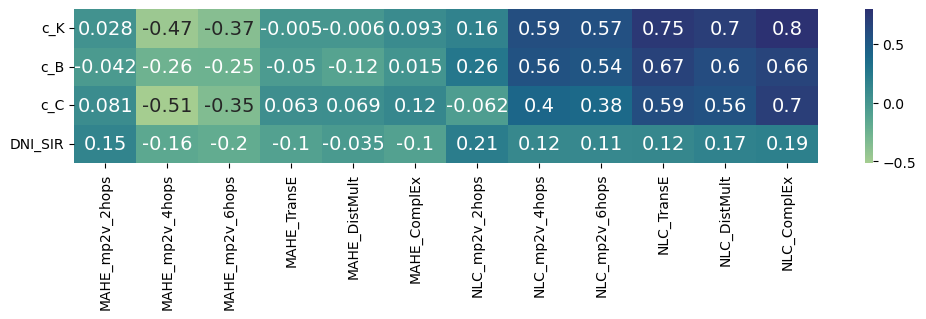

In [15]:
figs['dblp_kendall_cent'], axs['dblp_kendall_cent'] = plt.subplots(figsize=default_figsize)
sns.heatmap(
    corr['dblp_kendall']['cent'], 
    annot=True, 
    ax=axs['dblp_kendall_cent'], cmap="crest",
    annot_kws={'size': 14}
)

<Axes: >

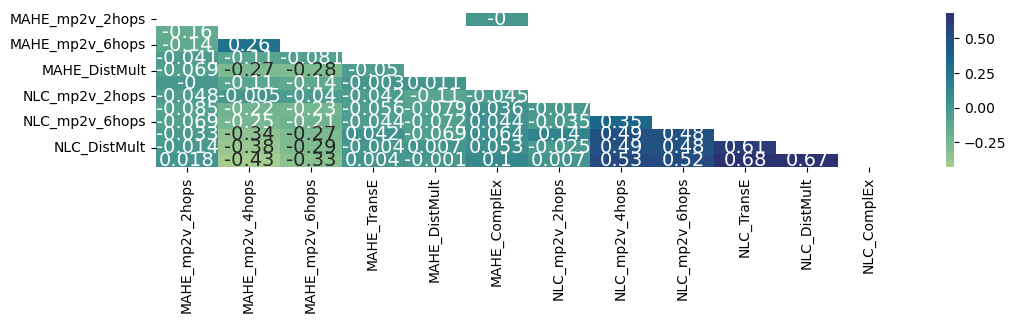

In [16]:
figs['dblp_kendall_repr'], axs['dblp_kendall_repr'] = plt.subplots(figsize=default_figsize)
sns.heatmap(
    corr['dblp_kendall']['repr'], 
    annot=True, 
    ax=axs['dblp_kendall_repr'], cmap="crest",
    annot_kws={'size': 14},
    mask=np.triu(corr['dblp_kendall']['repr'])
)

#### Spearman

In [17]:
corr['dblp_spearman'] = {
    'cent': rankings['dblp'].corr(method='spearman').round(3).loc[new_centrality_columns, new_method_columns],
    'repr': rankings['dblp'].corr(method='spearman').round(3).loc[new_method_columns, new_method_columns]
}

<Axes: >

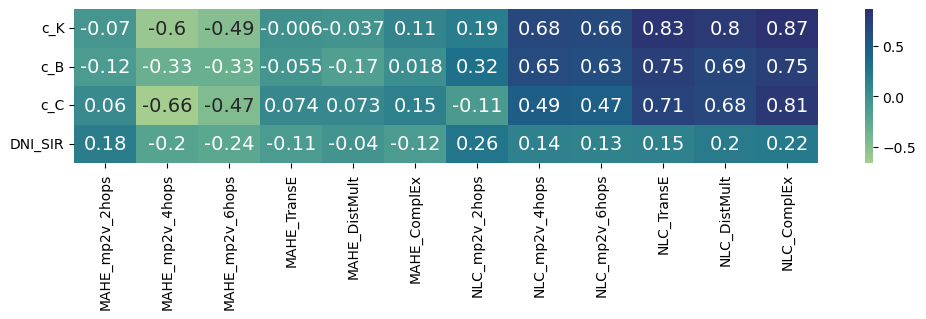

In [18]:
figs['dblp_spearman_cent'], axs['dblp_spearman_cent'] = plt.subplots(figsize=default_figsize)
sns.heatmap(
    corr['dblp_spearman']['cent'], 
    annot=True, 
    ax=axs['dblp_spearman_cent'], cmap="crest",
    annot_kws={'size': 14}
)

<Axes: >

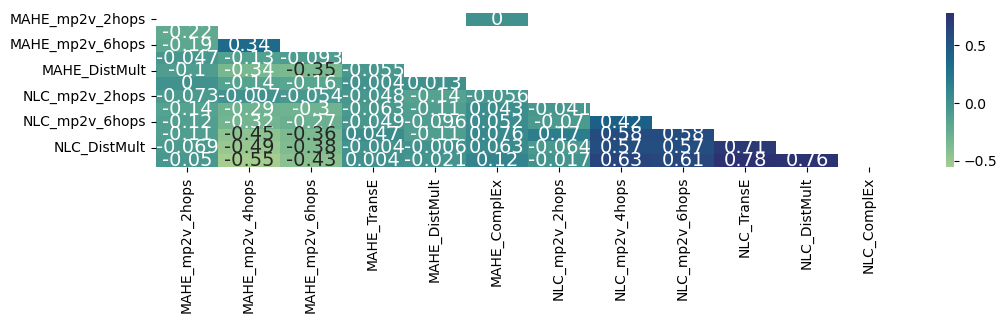

In [19]:
figs['dblp_spearman_repr'], axs['dblp_spearman_repr'] = plt.subplots(figsize=default_figsize)
sns.heatmap(
    corr['dblp_spearman']['repr'], 
    annot=True, 
    ax=axs['dblp_spearman_repr'], cmap="crest",
    annot_kws={'size': 14},
    mask=np.triu(corr['dblp_spearman']['repr'])
)

### Simulations

In [20]:
sims['dblp'] = {}

#### MAHE

mp2v_2hops: 5469.66 (1527.21)
mp2v_4hops: 4241.76 (1834.13)
mp2v_6hops: 3948.59 (1905.84)
transE: 521.95 (1375.40)
distmult: 4102.75 (2043.01)
complEx: 2130.56 (1922.28)


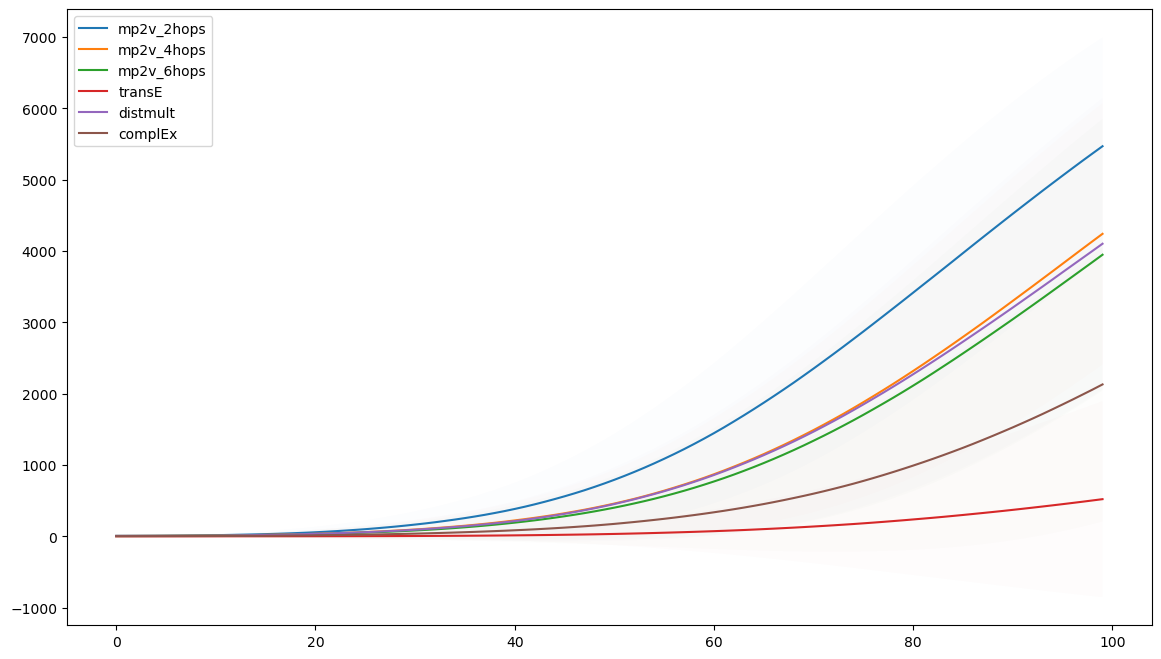

In [21]:
with open('results/data/dblp/sir_mahe_simulation.pkl', 'rb') as f:
    sims['dblp']['mahe'] = pkl.load(f)

plt.subplots(figsize=(14,8))
for model_name, sim in sims['dblp']['mahe'].items():
    print(f"{model_name}: {sim[0]:.2f} ({sim[1]:.2f})")
    plt.plot(range(sim[4]), sim[2], label=model_name)
    plt.fill_between(range(sim[4]), sim[2] - sim[3], sim[2] + sim[3], alpha=scatter_alpha)

plt.legend(loc='upper left')
plt.show()

#### NLC

mp2v_2hops: 5177.31 (1667.13)
mp2v_4hops: 5427.97 (1461.52)
mp2v_6hops: 4938.95 (1632.52)
transE: 5287.77 (1689.24)
distmult: 5665.49 (1432.81)
complEx: 5556.73 (1430.11)


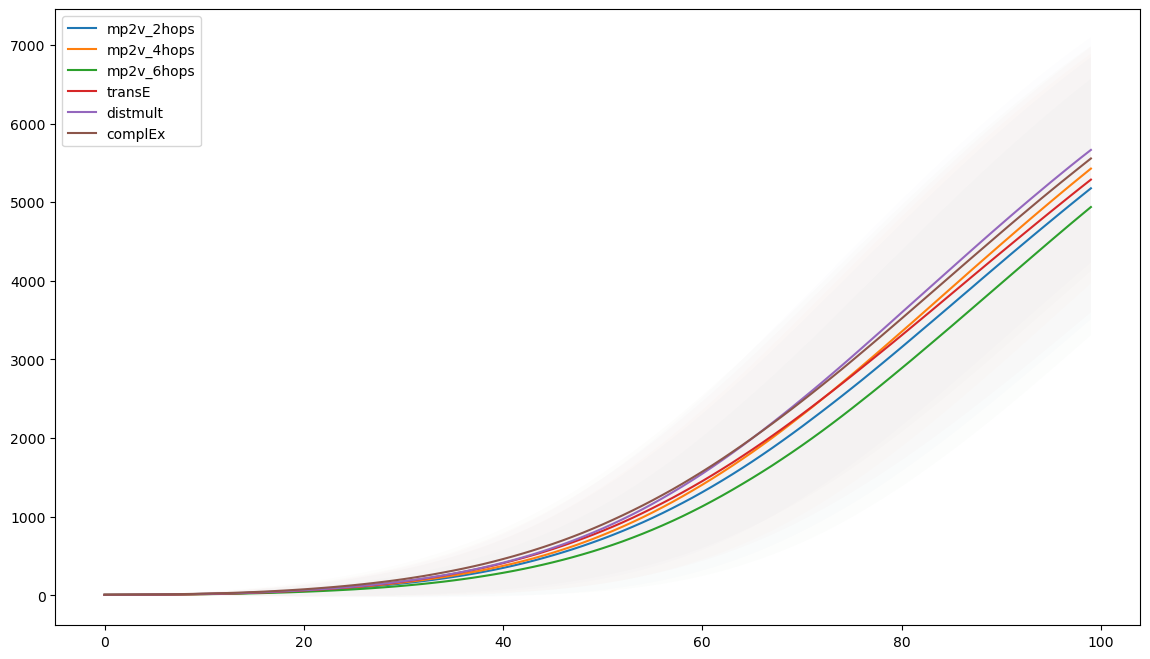

In [22]:
with open('results/data/dblp/sir_nlc_simulation.pkl', 'rb') as f:
    sims['dblp']['nlc'] = pkl.load(f)

plt.subplots(figsize=(14,8))
for model_name, sim in sims['dblp']['nlc'].items():
    print(f"{model_name}: {sim[0]:.2f} ({sim[1]:.2f})")
    plt.plot(range(sim[4]), sim[2], label=model_name)
    plt.fill_between(range(sim[4]), sim[2] - sim[3], sim[2] + sim[3], alpha=scatter_alpha)

plt.legend(loc='upper left')
plt.show()

## ACM

### Measures

In [23]:
measures['acm'] = pd.read_csv('results/exp/20250506100826/acm/20250506101534_df_measures_results.csv', index_col=0).dropna()
# measures.loc[:, 'SIR'] = measures.dropna()['SIR'].apply(lambda x: eval(re.findall(r"\((\d+.\d+),", x)[0]))
measures['acm'].rename(columns=dict(zip(original_centrality_columns, new_centrality_columns)), inplace=True)
measures['acm'].rename(columns=dict(zip(original_method_columns, new_method_columns)), inplace=True)
measures['acm']

,mp2v_2hops,mp2v_4hops,mp2v_6hops,transE,distmult,complEx,NLC_mp2v_2hops,NLC_mp2v_4hops,NLC_mp2v_6hops,NLC_TransE,...,MAHE_mp2v_6hops,MAHE_TransE,MAHE_DistMult,MAHE_ComplEx,DNI_SIR,eig,deg,c_B,c_C,c_K
3025,3594.434082,3819.165039,3672.697754,2803.106445,2181.799072,2477.543457,0.101062,0.197811,0.741136,0.003545,...,580.111206,1115.364624,72.257988,1517.463623,1.385,0.000593,0.000664,0.000322,0.189392,4.0
3026,3286.718750,3016.177246,3002.245117,2835.943359,2399.971924,2517.181152,4.594189,3.175433,2.655493,0.015484,...,1052.568359,1520.698486,35.133881,1044.656982,4.132,0.004192,0.003983,0.003859,0.209633,6.0
3027,4269.676758,3623.977539,3590.118164,2766.660889,2831.941895,2741.458008,0.035716,0.013011,0.037164,0.000618,...,19.788256,1665.125732,169.192261,1570.039307,1.045,0.000004,0.000221,0.000000,0.148634,2.0
3028,4205.018555,4103.141113,4084.221924,2859.360107,2887.464844,2774.014160,0.020744,0.006692,0.005515,0.002586,...,417.064331,2522.361572,68.143860,422.986206,1.106,0.000005,0.000221,0.000000,0.160050,2.0
3029,4140.190430,4170.680176,3868.379639,2532.257812,3066.160889,2333.411133,0.046301,0.225571,0.152085,0.004449,...,846.224304,754.528564,25.923508,1804.047729,1.592,0.000592,0.000443,0.000058,0.187216,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8979,3713.275879,4291.875977,3666.418701,2001.234619,2576.474365,2525.744873,0.178413,0.068583,0.038469,0.001629,...,930.410522,1699.937744,-36.502922,2702.822266,1.113,0.000584,0.000221,0.000000,0.177393,2.0
8980,4261.027344,4125.480469,4043.991211,2215.720703,2964.538574,2434.112305,0.092602,0.109336,0.043695,0.001941,...,778.879028,2617.237305,29.911037,2565.651855,1.365,0.000584,0.000221,0.000000,0.177400,2.0
8981,3814.057129,4318.338867,4193.128906,2279.082520,2731.743164,2807.487793,0.040807,0.109381,0.030641,0.000890,...,967.561340,-768.739868,-37.275497,2948.882324,1.060,0.000584,0.000221,0.000000,0.177400,2.0
8982,4278.124023,4328.374512,4186.976562,2538.738525,3273.845459,2931.087891,0.007143,0.060997,0.038546,0.000841,...,1079.006104,1086.555298,12.085475,2524.132568,1.168,0.000584,0.000221,0.000000,0.177400,2.0


In [24]:
corr['acm_pearson'] = {
    'cent': measures['acm'].corr(method='pearson').round(3).loc[new_centrality_columns, new_method_columns],
    'repr': measures['acm'].corr(method='pearson').round(3).loc[new_method_columns, new_method_columns]
}

<Axes: >

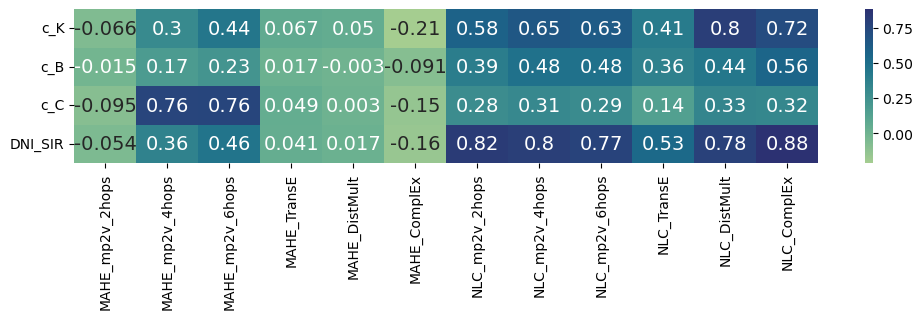

In [25]:
figs['acm_pearson_cent'], axs['acm_pearson_cent'] = plt.subplots(figsize=default_figsize)
sns.heatmap(
    corr['acm_pearson']['cent'], 
    annot=True, 
    ax=axs['acm_pearson_cent'], cmap="crest",
    annot_kws={'size': 14}
)

<Axes: >

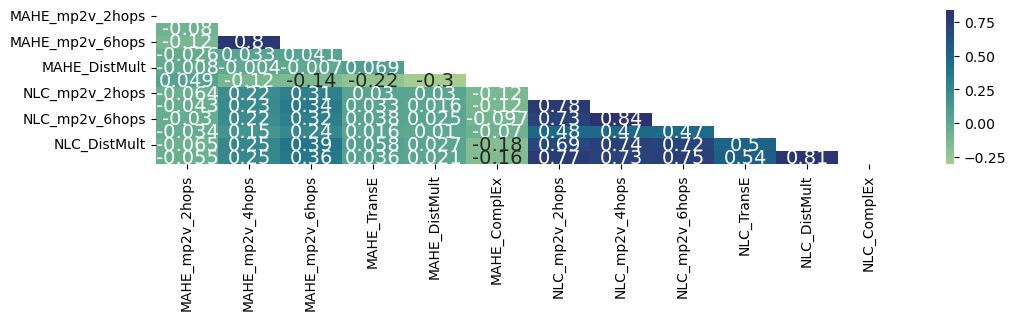

In [26]:
figs['acm_pearson_repr'], axs['acm_pearson_repr'] = plt.subplots(figsize=default_figsize)
sns.heatmap(
    corr['acm_pearson']['repr'], 
    annot=True, 
    ax=axs['acm_pearson_repr'], cmap="crest",
    annot_kws={'size': 14},
    mask=np.triu(corr['acm_pearson']['repr'])
)

### Rankings

In [27]:
rankings['acm'] = pd.read_csv('results/exp/20250506100826/acm/20250506101535_df_rank_results.csv', index_col=0).dropna()
rankings['acm'].rename(columns=dict(zip(original_centrality_columns, new_centrality_columns)), inplace=True)
rankings['acm'].rename(columns=dict(zip(original_method_columns, new_method_columns)), inplace=True)
rankings['acm']

,mp2v_2hops,mp2v_4hops,mp2v_6hops,transE,distmult,complEx,NLC_mp2v_2hops,NLC_mp2v_4hops,NLC_mp2v_6hops,NLC_TransE,...,MAHE_mp2v_6hops,MAHE_TransE,MAHE_DistMult,MAHE_ComplEx,DNI_SIR,eig,deg,c_B,c_C,c_K
3025,3.0,1.0,2.0,4.0,6.0,5.0,20.0,17.0,15.0,21.0,...,10.0,8.0,11.0,7.0,14.0,23.0,22.0,24.0,18.0,13.0
3026,1.0,2.0,3.0,4.0,6.0,5.0,14.0,16.0,17.0,21.0,...,9.0,7.0,11.0,10.0,15.0,22.0,23.0,24.0,20.0,13.0
3027,1.0,2.0,3.0,5.0,4.0,6.0,19.0,20.0,18.0,21.0,...,11.0,7.0,10.0,8.0,14.0,23.0,22.0,24.0,15.0,13.0
3028,1.0,2.0,3.0,5.0,4.0,6.0,17.0,18.0,19.0,20.0,...,10.0,7.0,11.0,9.0,13.0,22.0,21.0,23.0,14.0,12.0
3029,2.0,1.0,3.0,5.0,4.0,6.0,19.0,15.0,18.0,20.0,...,9.0,10.0,11.0,7.0,13.0,21.0,22.0,23.0,16.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8979,2.0,1.0,3.0,7.0,5.0,6.0,14.0,17.0,19.0,20.0,...,10.0,8.0,24.0,4.0,13.0,21.0,22.0,23.0,15.0,12.0
8980,1.0,2.0,3.0,8.0,4.0,7.0,16.0,15.0,18.0,20.0,...,10.0,5.0,11.0,6.0,13.0,21.0,22.0,23.0,14.0,12.0
8981,3.0,1.0,2.0,7.0,6.0,5.0,15.0,13.0,17.0,18.0,...,9.0,24.0,23.0,4.0,11.0,19.0,20.0,21.0,12.0,10.0
8982,2.0,1.0,3.0,6.0,4.0,5.0,19.0,15.0,16.0,20.0,...,10.0,9.0,11.0,7.0,13.0,21.0,22.0,23.0,14.0,12.0


#### Kendall

In [28]:
corr['acm_kendall'] = {
    'cent': rankings['acm'].corr(method='kendall').round(3).loc[new_centrality_columns, new_method_columns],
    'repr': rankings['acm'].corr(method='kendall').round(3).loc[new_method_columns, new_method_columns]
}

<Axes: >

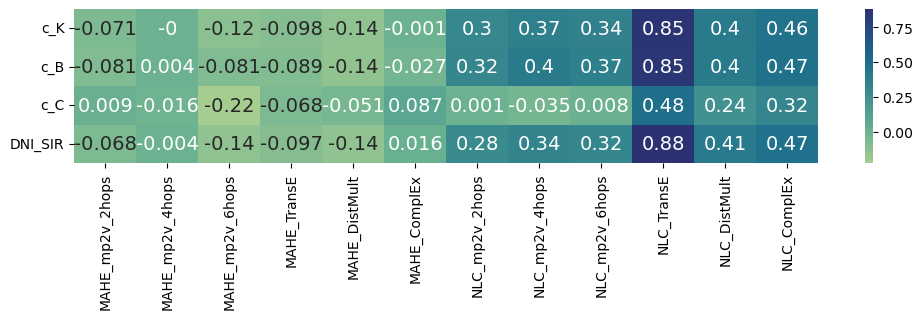

In [29]:
figs['acm_kendall_cent'], axs['acm_kendall_cent'] = plt.subplots(figsize=default_figsize)
#ax.set_title("ACM Kendall correlation between ranks (centrality vs embeddings)")
sns.heatmap(
    corr['acm_kendall']['cent'], 
    annot=True, 
    ax=axs['acm_kendall_cent'], cmap="crest",
    annot_kws={'size': 14}
)

<Axes: >

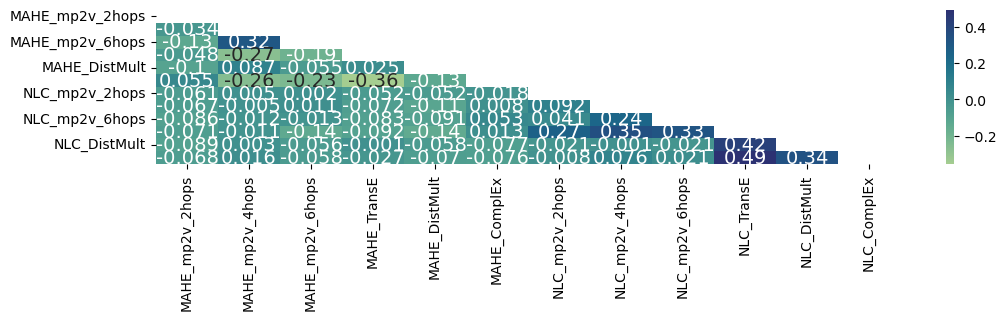

In [30]:
figs['acm_kendall_repr'], axs['acm_kendall_repr'] = plt.subplots(figsize=default_figsize)
sns.heatmap(
    corr['acm_kendall']['repr'], 
    annot=True, 
    ax=axs['acm_kendall_repr'], cmap="crest",
    annot_kws={'size': 14},
    mask=np.triu(corr['acm_kendall']['repr'])
)

#### Spearman

In [31]:
corr['acm_spearman'] = {
    'cent': rankings['acm'].corr(method='spearman').round(3).loc[new_centrality_columns, new_method_columns],
    'repr': rankings['acm'].corr(method='spearman').round(3).loc[new_method_columns, new_method_columns]
}

<Axes: >

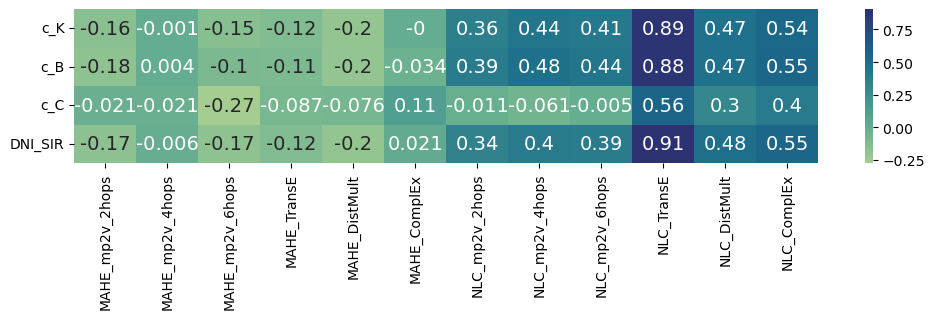

In [32]:
figs['acm_spearman_cent'], axs['acm_spearman_cent'] = plt.subplots(figsize=default_figsize)
sns.heatmap(
    corr['acm_spearman']['cent'], 
    annot=True, 
    ax=axs['acm_spearman_cent'], cmap="crest",
    annot_kws={'size': 14}
)

<Axes: >

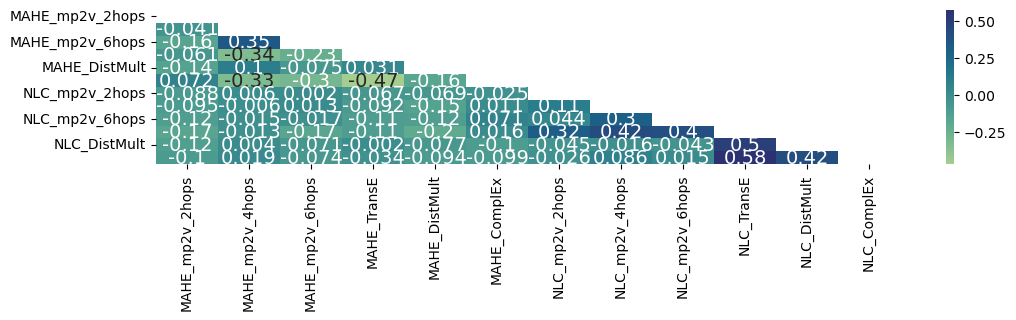

In [33]:
figs['acm_spearman_repr'], axs['acm_spearman_repr'] = plt.subplots(figsize=default_figsize)
sns.heatmap(
    corr['acm_spearman']['repr'], 
    annot=True, 
    ax=axs['acm_spearman_repr'], cmap="crest",
    annot_kws={'size': 14},
    mask=np.triu(corr['acm_spearman']['repr'])
)

### Simulations

In [34]:
sims['acm'] = {}

#### MAHE

mp2v_2hops: 1297.07 (624.48)
mp2v_4hops: 1389.77 (586.49)
mp2v_6hops: 1293.45 (574.34)
transE: 1112.69 (641.44)
distmult: 1117.72 (603.37)
complEx: 1177.85 (620.24)


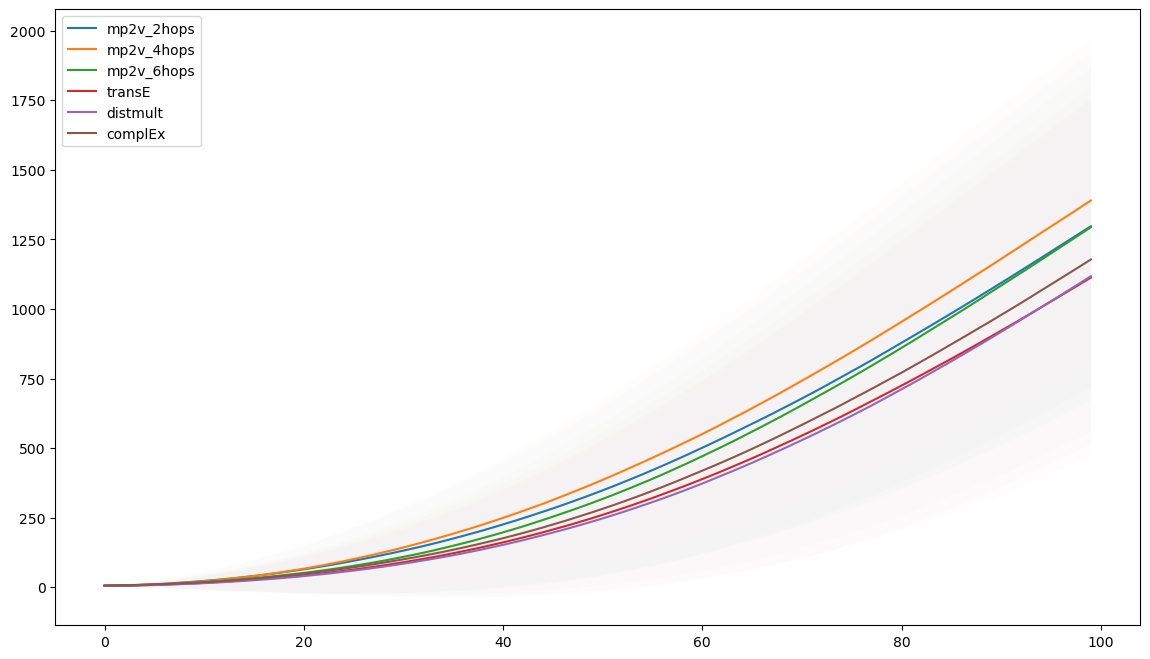

In [35]:
with open('results/data/acm/sir_mahe_simulation.pkl', 'rb') as f:
    sims['acm']['mahe'] = pkl.load(f)

plt.subplots(figsize=(14,8))
for model_name, sim in sims['acm']['mahe'].items():
    print(f"{model_name}: {sim[0]:.2f} ({sim[1]:.2f})")
    plt.plot(range(sim[4]), sim[2], label=model_name)
    plt.fill_between(range(sim[4]), sim[2] - sim[3], sim[2] + sim[3], alpha=scatter_alpha)

plt.legend(loc='upper left')
plt.show()

#### NLC

mp2v_2hops: 1568.05 (547.40)
mp2v_4hops: 1463.89 (607.52)
mp2v_6hops: 1565.66 (525.42)
transE: 843.24 (571.22)
distmult: 1589.48 (540.98)
complEx: 1572.79 (585.63)


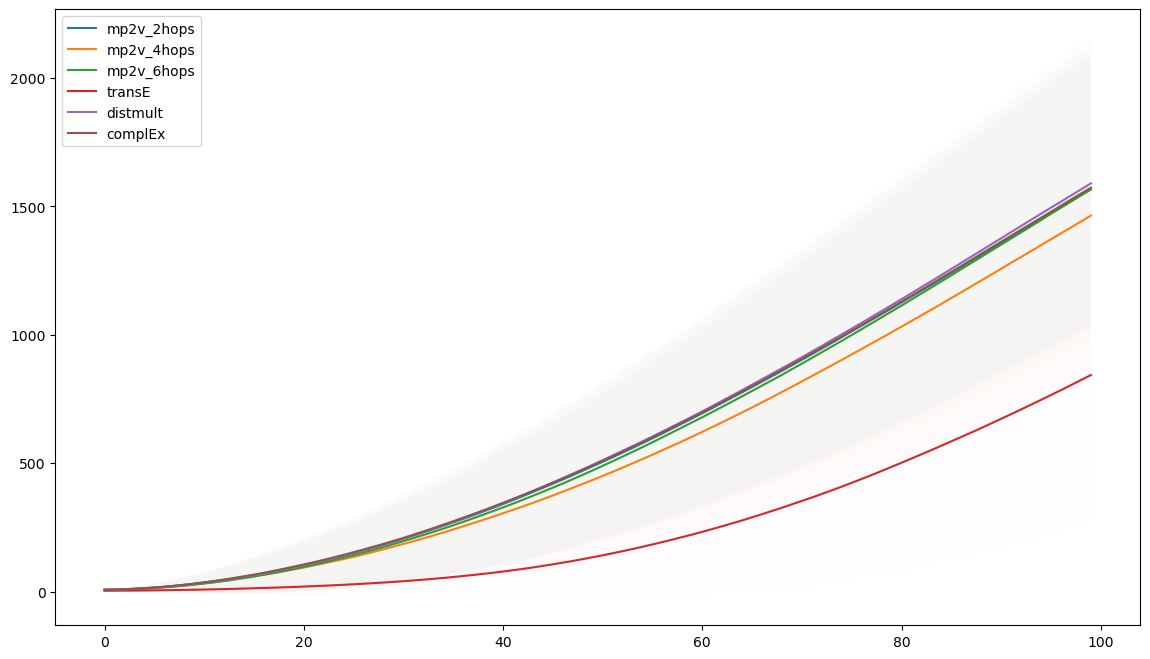

In [36]:
with open('results/data/acm/sir_nlc_simulation.pkl', 'rb') as f:
    sims['acm']['nlc'] = pkl.load(f)

plt.subplots(figsize=(14,8))
for model_name, sim in sims['acm']['nlc'].items():
    print(f"{model_name}: {sim[0]:.2f} ({sim[1]:.2f})")
    plt.plot(range(sim[4]), sim[2], label=model_name)
    plt.fill_between(range(sim[4]), sim[2] - sim[3], sim[2] + sim[3], alpha=scatter_alpha)

plt.legend(loc='upper left')
plt.show()

## IMDB

### Measures

In [37]:
measures['imdb'] = pd.read_csv('results/exp/20250506100826/imdb/20250506101016_df_measures_results.csv', index_col=0).dropna()
# measures.loc[:, 'SIR'] = measures.dropna()['SIR'].apply(lambda x: eval(re.findall(r"\((\d+.\d+),", x)[0]))
measures['imdb'].rename(columns=dict(zip(original_centrality_columns, new_centrality_columns)), inplace=True)
measures['imdb'].rename(columns=dict(zip(original_method_columns, new_method_columns)), inplace=True)
measures['imdb']

,mp2v_2hops,mp2v_4hops,mp2v_6hops,transE,distmult,complEx,NLC_mp2v_2hops,NLC_mp2v_4hops,NLC_mp2v_6hops,NLC_TransE,...,MAHE_mp2v_6hops,MAHE_TransE,MAHE_DistMult,MAHE_ComplEx,DNI_SIR,eig,deg,c_B,c_C,c_K
6359,3529.274170,3455.298584,3312.301025,2817.385498,2270.141113,2046.033203,0.176726,0.724023,0.352809,0.006187,...,138.920044,5422.536621,85.657883,5869.436523,1.467,1.498083e-02,0.000861,0.000719,0.131863,6.0
6360,3144.919922,3703.248047,3281.907715,2978.204590,2151.653564,2027.277588,0.014994,0.117937,0.047191,0.009238,...,-51.746853,5642.450684,35.534454,3828.787598,1.071,2.528739e-06,0.000172,0.000000,0.087713,2.0
6361,3480.116455,3140.687988,3190.918457,2899.965820,2680.769287,2068.534668,0.502118,0.162392,0.181793,0.007723,...,-52.836498,4750.671387,-3.568678,4133.275391,1.464,1.589610e-04,0.000861,0.001426,0.106584,4.0
6362,3838.600342,2313.271484,2773.880859,2872.716553,2165.697754,1775.917969,0.133937,0.103729,0.119626,0.000919,...,-77.187012,6310.380859,36.451355,4317.229492,1.058,4.082833e-45,0.000172,0.000000,0.000197,2.0
6363,3852.680176,3699.779053,3564.894775,2781.152344,1964.416016,1855.088623,0.098297,0.094951,0.090130,0.004934,...,22.112329,4490.114746,32.072472,4388.424805,1.050,1.342158e-04,0.000172,0.000000,0.108885,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11611,3791.097656,3638.471436,2944.778564,1757.261963,2249.467041,2148.244141,0.162810,0.026673,0.040548,0.006771,...,-15.756235,-1211.123291,20.193058,3611.068604,1.062,2.074880e-05,0.000172,0.000000,0.097942,2.0
11612,3847.247559,2699.685791,2602.403564,1834.651245,2923.910889,2200.234375,0.000755,0.040977,0.004659,0.011893,...,-80.251060,1250.914062,-57.196278,4050.132812,1.061,4.082833e-45,0.000172,0.000000,0.000197,2.0
11613,3838.751465,3469.447266,3682.550537,1579.515137,1925.420410,1915.838013,0.011813,0.040240,0.024706,0.001915,...,-110.298370,-1496.642334,9.109341,4410.365234,1.049,2.187887e-04,0.000172,0.000000,0.109251,2.0
11614,3443.911133,3768.723145,3603.477539,1708.240356,2077.619141,1811.443237,0.012255,0.012652,0.000788,0.004010,...,-153.960587,-1210.306641,-74.045471,4844.303711,1.065,2.536681e-06,0.000172,0.000000,0.088116,2.0


In [38]:
corr['imdb_pearson'] = {
    'cent': measures['imdb'].corr(method='pearson').round(3).loc[new_centrality_columns, new_method_columns],
    'repr': measures['imdb'].corr(method='pearson').round(3).loc[new_method_columns, new_method_columns]
}

<Axes: >

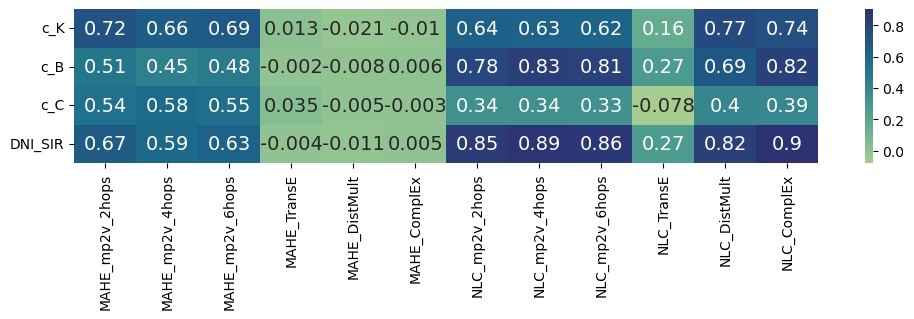

In [39]:
figs['imdb_pearson_cent'], axs['imdb_pearson_cent'] = plt.subplots(figsize=default_figsize)
#ax.set_title("IMDB Pearson correlation between values (centrality vs embeddings)")
sns.heatmap(
    corr['imdb_pearson']['cent'], 
    annot=True, 
    ax=axs['imdb_pearson_cent'], cmap="crest",
    annot_kws={'size': 14}
)

<Axes: >

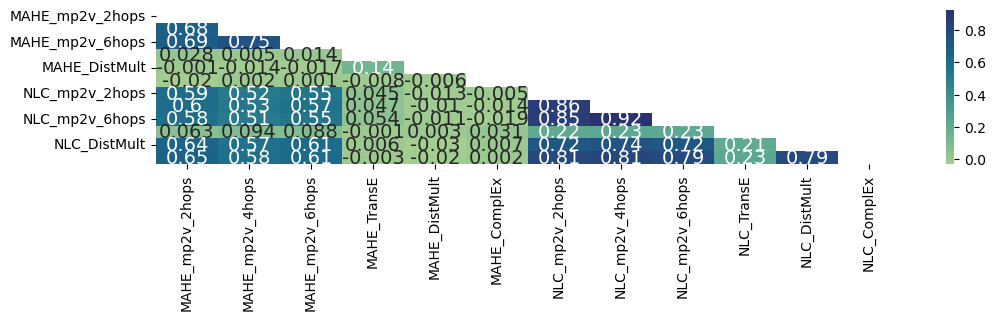

In [40]:
figs['imdb_pearson_repr'], axs['imdb_pearson_repr'] = plt.subplots(figsize=default_figsize)
#ax.set_title("IMDB Pearson correlation between values (centrality vs embeddings)")
sns.heatmap(
    corr['imdb_pearson']['repr'], 
    annot=True, 
    ax=axs['imdb_pearson_repr'], cmap="crest",
    annot_kws={'size': 14},
    mask=np.triu(corr['imdb_pearson']['repr'])
)

### Ranking

In [41]:
rankings['imdb'] = pd.read_csv('results/exp/20250506100826/imdb/20250506101017_df_rank_results.csv', index_col=0).dropna()
rankings['imdb'].rename(columns=dict(zip(original_centrality_columns, new_centrality_columns)), inplace=True)
rankings['imdb'].rename(columns=dict(zip(original_method_columns, new_method_columns)), inplace=True)
rankings['imdb']

,mp2v_2hops,mp2v_4hops,mp2v_6hops,transE,distmult,complEx,NLC_mp2v_2hops,NLC_mp2v_4hops,NLC_mp2v_6hops,NLC_TransE,...,MAHE_mp2v_6hops,MAHE_TransE,MAHE_DistMult,MAHE_ComplEx,DNI_SIR,eig,deg,c_B,c_C,c_K
6359,3.0,4.0,5.0,6.0,7.0,8.0,19.0,15.0,16.0,22.0,...,10.0,2.0,12.0,1.0,14.0,21.0,23.0,24.0,20.0,13.0
6360,5.0,3.0,4.0,6.0,7.0,8.0,17.0,12.0,15.0,18.0,...,22.0,1.0,9.0,2.0,11.0,20.0,19.0,21.0,13.0,10.0
6361,3.0,5.0,4.0,6.0,7.0,8.0,13.0,16.0,15.0,19.0,...,24.0,1.0,23.0,2.0,12.0,22.0,21.0,20.0,18.0,11.0
6362,3.0,6.0,5.0,4.0,7.0,8.0,12.0,14.0,13.0,17.0,...,23.0,1.0,9.0,2.0,11.0,20.0,19.0,21.0,18.0,10.0
6363,3.0,4.0,5.0,6.0,7.0,8.0,16.0,17.0,18.0,21.0,...,10.0,1.0,9.0,2.0,14.0,23.0,22.0,24.0,15.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11611,1.0,2.0,4.0,7.0,5.0,6.0,11.0,15.0,13.0,17.0,...,21.0,24.0,8.0,3.0,10.0,19.0,18.0,20.0,12.0,9.0
11612,2.0,4.0,5.0,7.0,3.0,6.0,16.0,12.0,15.0,14.0,...,23.0,8.0,21.0,1.0,10.0,19.0,18.0,20.0,17.0,9.0
11613,2.0,4.0,3.0,7.0,5.0,6.0,17.0,13.0,14.0,18.0,...,23.0,24.0,9.0,1.0,11.0,19.0,20.0,21.0,12.0,10.0
11614,4.0,2.0,3.0,7.0,5.0,6.0,14.0,13.0,16.0,15.0,...,22.0,24.0,21.0,1.0,9.0,18.0,17.0,19.0,10.0,8.0


#### Kendall

In [42]:
corr['imdb_kendall'] = {
    'cent': rankings['imdb'].corr(method='kendall').round(3).loc[new_centrality_columns, new_method_columns],
    'repr': rankings['imdb'].corr(method='kendall').round(3).loc[new_method_columns, new_method_columns]
}

<Axes: >

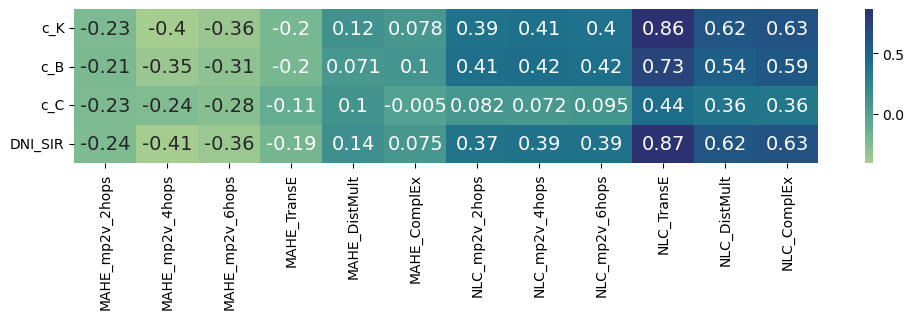

In [43]:
figs['imdb_kendall_cent'], axs['imdb_kendall_cent'] = plt.subplots(figsize=default_figsize)
#ax.set_title("IMDB Kendall correlation between ranks (centrality vs embeddings)")
sns.heatmap(
    corr['imdb_kendall']['cent'],
    annot=True, 
    ax=axs['imdb_kendall_cent'], cmap="crest",
    annot_kws={'size': 14}
)

<Axes: >

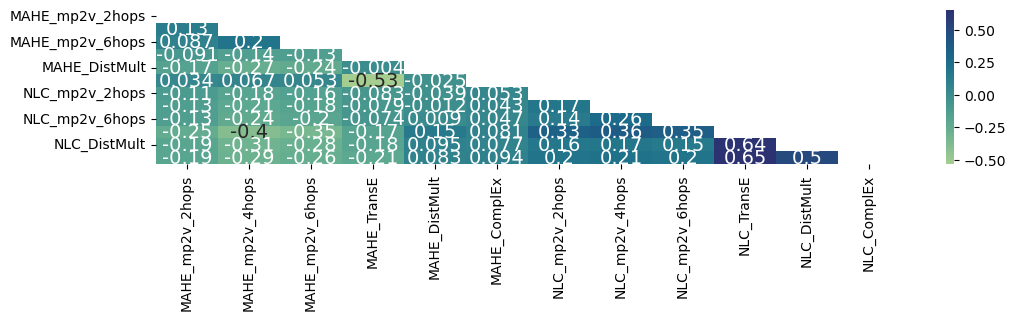

In [44]:
figs['imdb_kendall_repr'], axs['imdb_kendall_repr'] = plt.subplots(figsize=default_figsize)
#ax.set_title("IMDB Kendall correlation between ranks (centrality vs embeddings)")
sns.heatmap(
    corr['imdb_kendall']['repr'],
    annot=True, 
    ax=axs['imdb_kendall_repr'], cmap="crest",
    annot_kws={'size': 14},
    mask=np.triu(corr['imdb_kendall']['repr'])
)

#### Spearman

In [45]:
corr['imdb_spearman'] = {
    'cent': rankings['imdb'].corr(method='spearman').round(3).loc[new_centrality_columns, new_method_columns],
    'repr': rankings['imdb'].corr(method='spearman').round(3).loc[new_method_columns, new_method_columns]
}

<Axes: >

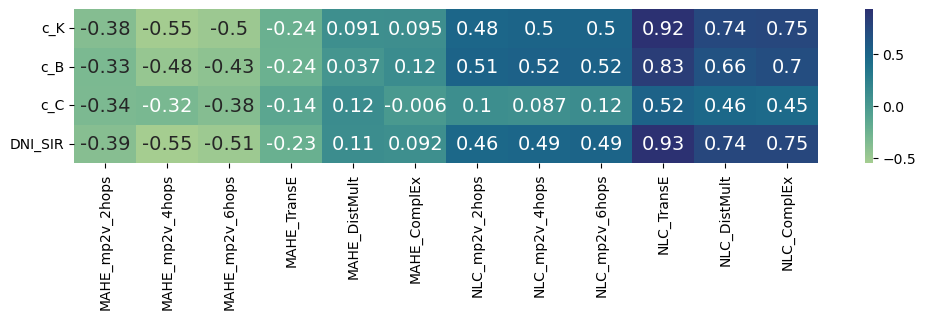

In [46]:
figs['imdb_spearman_cent'], axs['imdb_spearman_cent'] = plt.subplots(figsize=default_figsize)
sns.heatmap(
    corr['imdb_spearman']['cent'], 
    annot=True, 
    ax=axs['imdb_spearman_cent'], cmap="crest",
    annot_kws={'size': 14}
)

<Axes: >

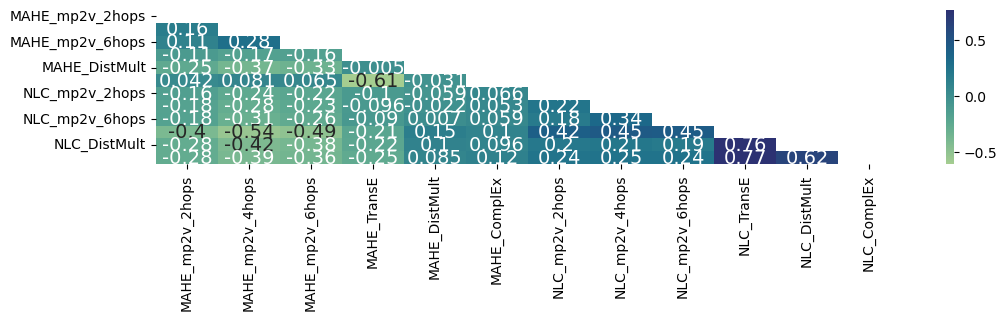

In [47]:
figs['imdb_spearman_repr'], axs['imdb_spearman_repr'] = plt.subplots(figsize=default_figsize)
sns.heatmap(
    corr['imdb_spearman']['repr'], 
    annot=True, 
    ax=axs['imdb_spearman_repr'], cmap="crest",
    annot_kws={'size': 14},
    mask=np.triu(corr['imdb_spearman']['repr'])
)

### Simulations

In [48]:
sims['imdb'] = {}

#### MAHE

mp2v_2hops: 297.71 (117.62)
mp2v_4hops: 255.83 (113.03)
mp2v_6hops: 257.21 (115.85)
transE: 77.39 (72.51)
distmult: 320.21 (122.45)
complEx: 160.09 (90.93)


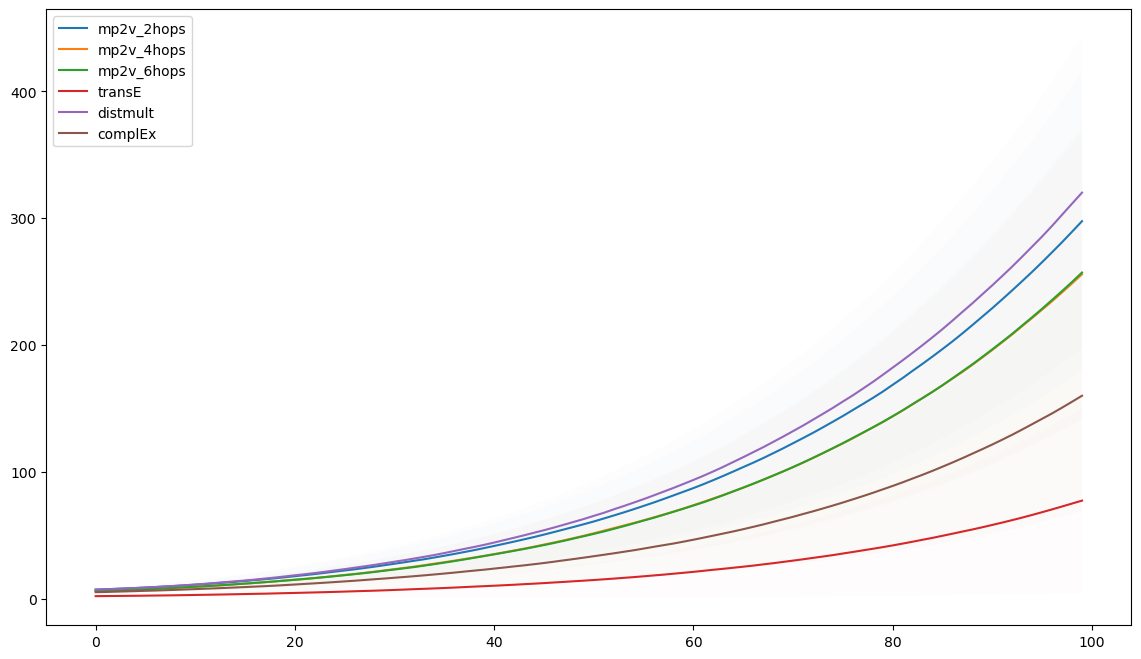

In [49]:
with open('results/data/imdb/sir_mahe_simulation.pkl', 'rb') as f:
    sims['imdb']['mahe'] = pkl.load(f)

plt.subplots(figsize=(14,8))
for model_name, sim in sims['imdb']['mahe'].items():
    print(f"{model_name}: {sim[0]:.2f} ({sim[1]:.2f})")
    plt.plot(range(sim[4]), sim[2], label=model_name)
    plt.fill_between(range(sim[4]), sim[2] - sim[3], sim[2] + sim[3], alpha=scatter_alpha)

plt.legend(loc='upper left')
plt.show()

#### NLC

mp2v_2hops: 287.33 (115.68)
mp2v_4hops: 260.47 (111.27)
mp2v_6hops: 172.81 (96.14)
transE: 230.07 (108.78)
distmult: 235.18 (105.75)
complEx: 243.96 (109.77)


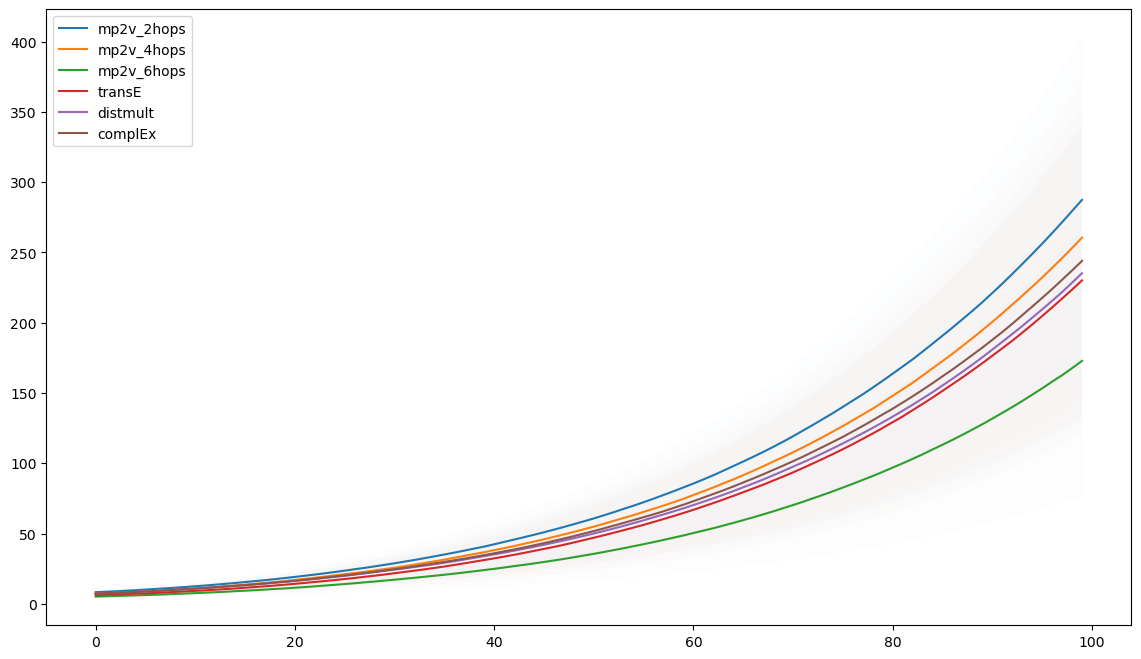

In [50]:
with open('results/data/imdb/sir_nlc_simulation.pkl', 'rb') as f:
    sims['imdb']['nlc'] = pkl.load(f)

plt.subplots(figsize=(14,8))
for model_name, sim in sims['imdb']['nlc'].items():
    print(f"{model_name}: {sim[0]:.2f} ({sim[1]:.2f})")
    plt.plot(range(sim[4]), sim[2], label=model_name)
    plt.fill_between(range(sim[4]), sim[2] - sim[3], sim[2] + sim[3], alpha=scatter_alpha)

plt.legend(loc='upper left')
plt.show()

## Facets

### Tables

In [51]:
measures.keys(), rankings.keys(), figs.keys(), axs.keys(), corr.keys()

(dict_keys(['dblp', 'acm', 'imdb']),
 dict_keys(['dblp', 'acm', 'imdb']),
 dict_keys(['dblp_pearson_cent', 'dblp_pearson_repr', 'dblp_kendall_cent', 'dblp_kendall_repr', 'dblp_spearman_cent', 'dblp_spearman_repr', 'acm_pearson_cent', 'acm_pearson_repr', 'acm_kendall_cent', 'acm_kendall_repr', 'acm_spearman_cent', 'acm_spearman_repr', 'imdb_pearson_cent', 'imdb_pearson_repr', 'imdb_kendall_cent', 'imdb_kendall_repr', 'imdb_spearman_cent', 'imdb_spearman_repr']),
 dict_keys(['dblp_pearson_cent', 'dblp_pearson_repr', 'dblp_kendall_cent', 'dblp_kendall_repr', 'dblp_spearman_cent', 'dblp_spearman_repr', 'acm_pearson_cent', 'acm_pearson_repr', 'acm_kendall_cent', 'acm_kendall_repr', 'acm_spearman_cent', 'acm_spearman_repr', 'imdb_pearson_cent', 'imdb_pearson_repr', 'imdb_kendall_cent', 'imdb_kendall_repr', 'imdb_spearman_cent', 'imdb_spearman_repr']),
 dict_keys(['dblp_pearson', 'dblp_kendall', 'dblp_spearman', 'acm_pearson', 'acm_kendall', 'acm_spearman', 'imdb_pearson', 'imdb_kendall', 'im

In [52]:
"""corr_cent_summary = pd.concat([
    # v.rename(index={i:f"{k.split('_')[0]}_{i}" for i in corr['dblp_pearson'].index}) 
    v['cent'].join(pd.DataFrame({'data': [k.split('_')[0]], 'corr_type': [k.split('_')[1]]}, 
                                index=v['cent'].index))
    for k, v in corr.items()
])"""

corr_cent_summary = pd.concat([
    # v.rename(index={i:f"{k.split('_')[0]}_{i}" for i in corr['dblp_pearson'].index}) 
    v['cent'].T.join(pd.DataFrame({
        'data': [k.split('_')[0]], 
        'corr_type': [k.split('_')[1]]
        }, index=v['cent'].T.index))
    for k, v in corr.items()
])

corr_cent_summary = corr_cent_summary[corr_cent_summary['corr_type'] != 'spearman']
corr_cent_summary['data'] = corr_cent_summary['data'].str.upper()
corr_cent_summary['corr_type'] = corr_cent_summary['corr_type'].str.capitalize()
corr_cent_summary

,c_K,c_B,c_C,DNI_SIR,data,corr_type
MAHE_mp2v_2hops,0.166,0.093,0.197,0.204,DBLP,Pearson
MAHE_mp2v_4hops,0.620,0.281,0.725,0.753,DBLP,Pearson
MAHE_mp2v_6hops,0.552,0.298,0.719,0.747,DBLP,Pearson
MAHE_TransE,-0.322,-0.061,-0.227,-0.227,DBLP,Pearson
MAHE_DistMult,0.020,-0.005,-0.041,-0.045,DBLP,Pearson
...,...,...,...,...,...,...
NLC_mp2v_4hops,0.405,0.423,0.072,0.392,IMDB,Kendall
NLC_mp2v_6hops,0.403,0.416,0.095,0.392,IMDB,Kendall
NLC_TransE,0.860,0.735,0.438,0.866,IMDB,Kendall
NLC_DistMult,0.617,0.543,0.361,0.616,IMDB,Kendall


/home/jgmbarbirato/miniconda3/envs/base-exp/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


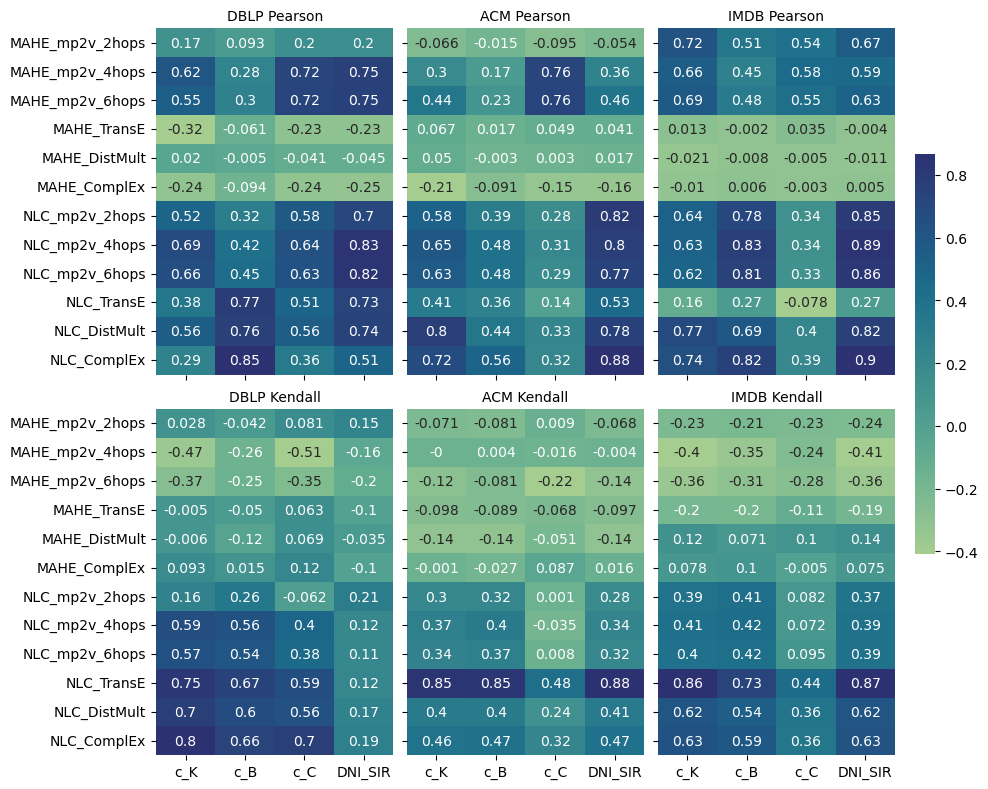

In [53]:
def facet(data, **kwargs):
    data = data.drop(['data', 'corr_type'], axis=1)
    sns.heatmap(data, annot=True, cmap='crest', **kwargs)

# with plt.rc_context(rc={"text.usetex":True, "text.latex.preamble": r"\usepackage{amsmath}"}):
with sns.plotting_context(font_scale=20):
    g = sns.FacetGrid(corr_cent_summary, col='data', row='corr_type')
    g.fig.set_figwidth(10)
    g.fig.set_figheight(8)
    cbar_ax = g.fig.add_axes([.92, .3, .02, .5])
    g.map_dataframe(facet, cbar_ax=cbar_ax)
    g.fig.subplots_adjust(right=.9)
    g.set_titles(template=r"{col_name} {row_name}")
    g.savefig(f"results/facets/{timestamp}_facet_plot.png",)

/home/jgmbarbirato/miniconda3/envs/base-exp/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


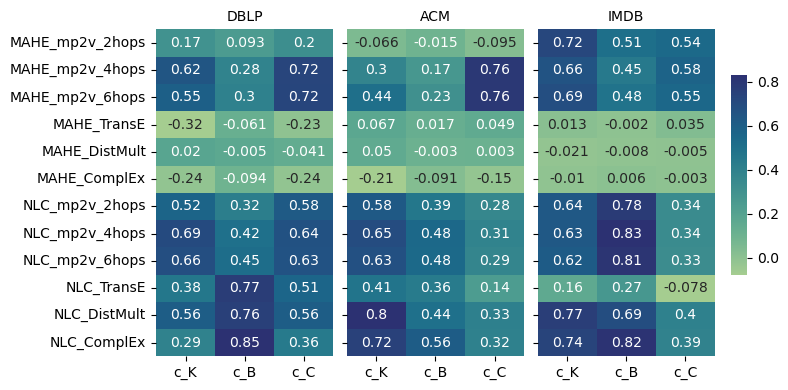

In [54]:
with sns.plotting_context(font_scale=20):
    g = sns.FacetGrid(corr_cent_summary[corr_cent_summary['corr_type'] == 'Pearson'].drop(columns=["DNI_SIR"]), col='data')
    g.fig.set_figwidth(8)
    g.fig.set_figheight(4)
    cbar_ax = g.fig.add_axes([.92, .3, .02, .5])
    g.map_dataframe(facet, cbar_ax=cbar_ax)
    g.fig.subplots_adjust(right=.9)
    g.set_titles(template=r"{col_name}")
    g.savefig(f"results/facets/{timestamp}_facet_plot_pearson.png",)

In [55]:
print(
    pd.DataFrame([
    gdf.rename(g[0]) for g, gdf 
    in corr_cent_summary.loc[corr_cent_summary['corr_type'] == 'Kendall', 
                             ['DNI_SIR', 'data']
                             ].groupby(by=['data'])['DNI_SIR']]).T.to_latex()
)

\begin{tabular}{lrrr}
\toprule
 & ACM & DBLP & IMDB \\
\midrule
MAHE_mp2v_2hops & -0.068000 & 0.153000 & -0.237000 \\
MAHE_mp2v_4hops & -0.004000 & -0.160000 & -0.408000 \\
MAHE_mp2v_6hops & -0.140000 & -0.196000 & -0.360000 \\
MAHE_TransE & -0.097000 & -0.104000 & -0.194000 \\
MAHE_DistMult & -0.140000 & -0.035000 & 0.142000 \\
MAHE_ComplEx & 0.016000 & -0.104000 & 0.075000 \\
NLC_mp2v_2hops & 0.282000 & 0.210000 & 0.369000 \\
NLC_mp2v_4hops & 0.336000 & 0.119000 & 0.392000 \\
NLC_mp2v_6hops & 0.322000 & 0.112000 & 0.392000 \\
NLC_TransE & 0.879000 & 0.125000 & 0.866000 \\
NLC_DistMult & 0.406000 & 0.168000 & 0.616000 \\
NLC_ComplEx & 0.471000 & 0.188000 & 0.626000 \\
\bottomrule
\end{tabular}



In [ ]:
corr_repr_summary = pd.concat([
    v['repr'].join(pd.DataFrame({'data': [k.split('_')[0]], 'corr_type': [k.split('_')[1]]}, 
                                index=v['repr'].index))
    for k, v in corr.items()
])
corr_repr_summary = corr_repr_summary[corr_repr_summary['corr_type'] != 'spearman']
corr_repr_summary['data'] = corr_repr_summary['data'].str.upper()
corr_repr_summary['corr_type'] = corr_repr_summary['corr_type'].str.capitalize()
corr_repr_summary

,MAHE_mp2v_2hops,MAHE_mp2v_4hops,MAHE_mp2v_6hops,MAHE_TransE,MAHE_DistMult,MAHE_ComplEx,NLC_mp2v_2hops,NLC_mp2v_4hops,NLC_mp2v_6hops,NLC_TransE,NLC_DistMult,NLC_ComplEx,data,corr_type
MAHE_mp2v_2hops,1.000,0.147,0.144,-0.075,0.005,-0.043,0.188,0.174,0.175,0.130,0.154,0.093,DBLP,Pearson
MAHE_mp2v_4hops,0.147,1.000,0.844,-0.245,-0.038,-0.206,0.486,0.645,0.601,0.465,0.500,0.290,DBLP,Pearson
MAHE_mp2v_6hops,0.144,0.844,1.000,-0.222,-0.068,-0.235,0.477,0.588,0.606,0.460,0.479,0.284,DBLP,Pearson
MAHE_TransE,-0.075,-0.245,-0.222,1.000,-0.015,0.102,-0.145,-0.211,-0.210,-0.069,-0.171,-0.088,DBLP,Pearson
MAHE_DistMult,0.005,-0.038,-0.068,-0.015,1.000,-0.022,-0.022,-0.001,-0.002,0.010,0.040,0.001,DBLP,Pearson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NLC_mp2v_4hops,-0.132,-0.213,-0.176,-0.079,-0.012,0.043,0.173,1.000,0.261,0.365,0.175,0.207,IMDB,Kendall
NLC_mp2v_6hops,-0.134,-0.237,-0.196,-0.074,0.009,0.047,0.145,0.261,1.000,0.353,0.154,0.197,IMDB,Kendall
NLC_TransE,-0.249,-0.399,-0.348,-0.174,0.153,0.081,0.333,0.365,0.353,1.000,0.636,0.651,IMDB,Kendall
NLC_DistMult,-0.190,-0.309,-0.275,-0.182,0.095,0.077,0.162,0.175,0.154,0.636,1.000,0.497,IMDB,Kendall


/home/jgmbarbirato/miniconda3/envs/base-exp/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


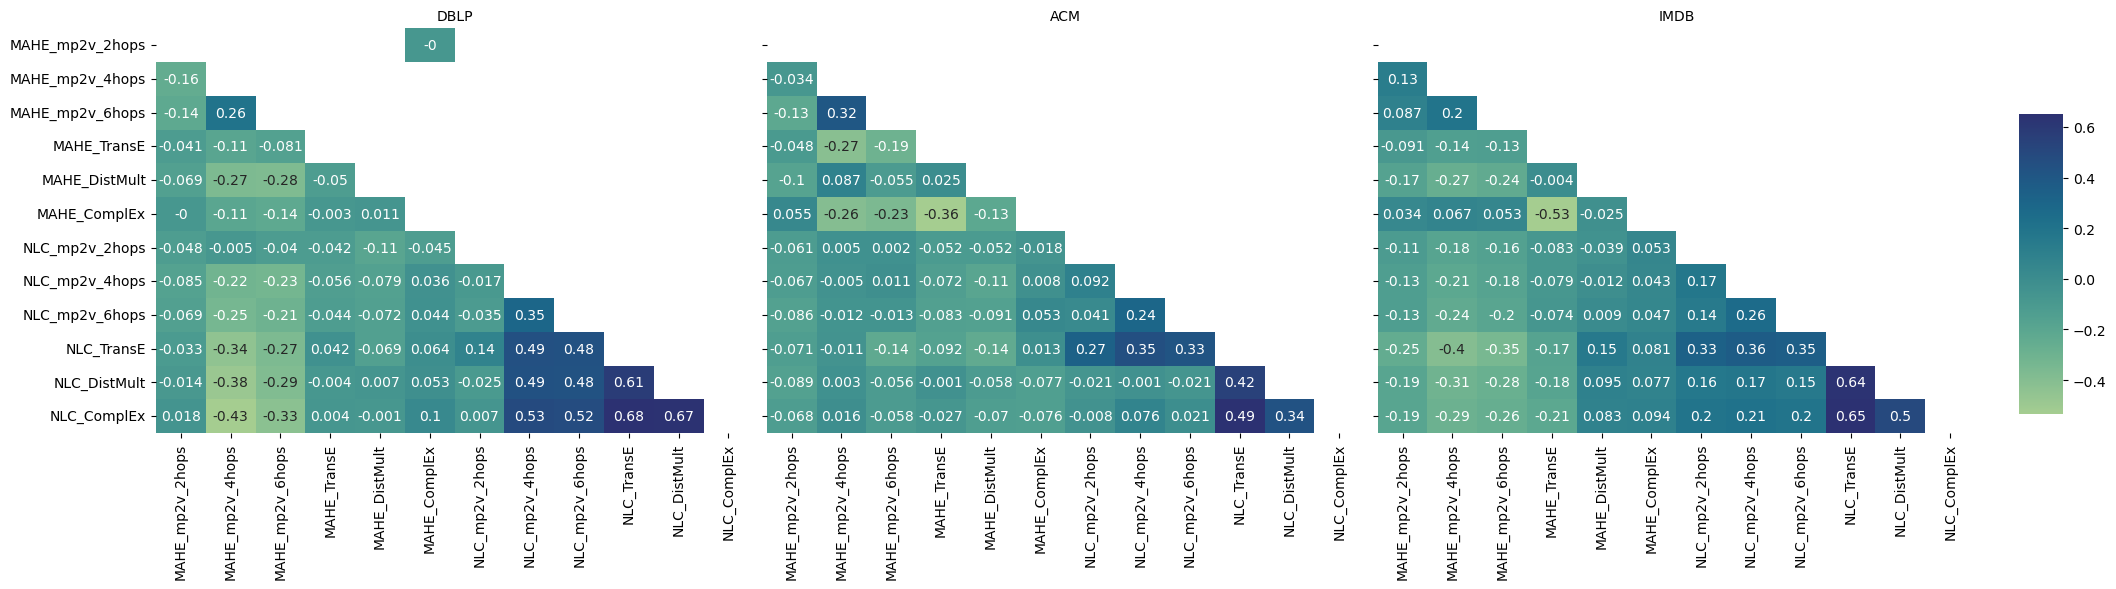

In [ ]:
def facet(data, **kwargs):
    data = data[data['corr_type'] != 'Spearman']
    data = data[data['corr_type'] == 'Kendall']
    data = data.drop(['data', 'corr_type'], axis=1)
    sns.heatmap(data, cmap='crest', mask=np.triu(data), **kwargs)
    

with sns.plotting_context(font_scale=30):
    g = sns.FacetGrid(corr_repr_summary, col='data')
    g.fig.set_figwidth(22)
    g.fig.set_figheight(6)
    cbar_ax = g.fig.add_axes([.92, .3, .02, .5])
    g.map_dataframe(facet, cbar_ax=cbar_ax)
    g.fig.subplots_adjust(right=.9)
    g.set_titles(template="{col_name}")
    g.savefig(f"results/facets/{timestamp}_facet_repr_plot.png",)

### Simulations

In [ ]:
all_sims_df = {}

In [ ]:
sims_df = pd.DataFrame([
    (sim[0], sim[1], sim[2], list(range(sim[4])), base_name, measure_name, model_name)
    for base_name, base_sims in sims.items()
    for measure_name, measures in base_sims.items() 
    for model_name, sim in measures.items()
], columns=['avg_sims', 'std_sims', 'DNI', 'steps', 'base_name', 'measure_name', 'model_name'])
#sims_df['model_name'].rename(columns=dict(zip(original_model_columns, new_model_columns)), inplace=True)
sims_df['model_name'] = sims_df['model_name'].replace(dict(zip(original_model_columns, new_model_columns)))
sims_df['measure_name'] = sims_df['measure_name'].str.upper()
sims_df

,avg_sims,std_sims,DNI,steps,base_name,measure_name,model_name
0,5469.660,1527.205942,"[7.399, 7.754, 8.144, 8.615, 9.229, 9.975, 10....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",dblp,MAHE,mp2v 2hops
1,4241.760,1834.129008,"[6.294, 6.564, 6.905, 7.273, 7.667, 8.186, 8.8...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",dblp,MAHE,mp2v 4hops
2,3948.590,1905.839729,"[5.229, 5.469, 5.73, 6.062, 6.409, 6.874, 7.49...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",dblp,MAHE,mp2v 6hops
3,521.949,1375.402205,"[1.003, 1.009, 1.005, 1.016, 1.026, 1.038, 1.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",dblp,MAHE,TransE
4,4102.751,2043.007224,"[6.213, 6.418, 6.67, 6.884, 7.156, 7.543, 8.04...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",dblp,MAHE,DistMult
5,2130.559,1922.284230,"[3.127, 3.25, 3.385, 3.537, 3.723, 3.942, 4.19...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",dblp,MAHE,ComplEx
6,5177.307,1667.130964,"[6.562, 7.098, 7.683, 8.317, 9.011, 9.902, 11....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",dblp,NLC,mp2v 2hops
7,5427.972,1461.522912,"[6.521, 7.028, 7.637, 8.347, 9.074, 9.973, 11....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",dblp,NLC,mp2v 4hops
8,4938.954,1632.523896,"[5.448, 5.951, 6.413, 6.925, 7.456, 8.08, 8.80...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",dblp,NLC,mp2v 6hops
9,5287.768,1689.235442,"[4.375, 4.762, 5.175, 5.723, 6.41, 7.161, 8.09...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",dblp,NLC,TransE


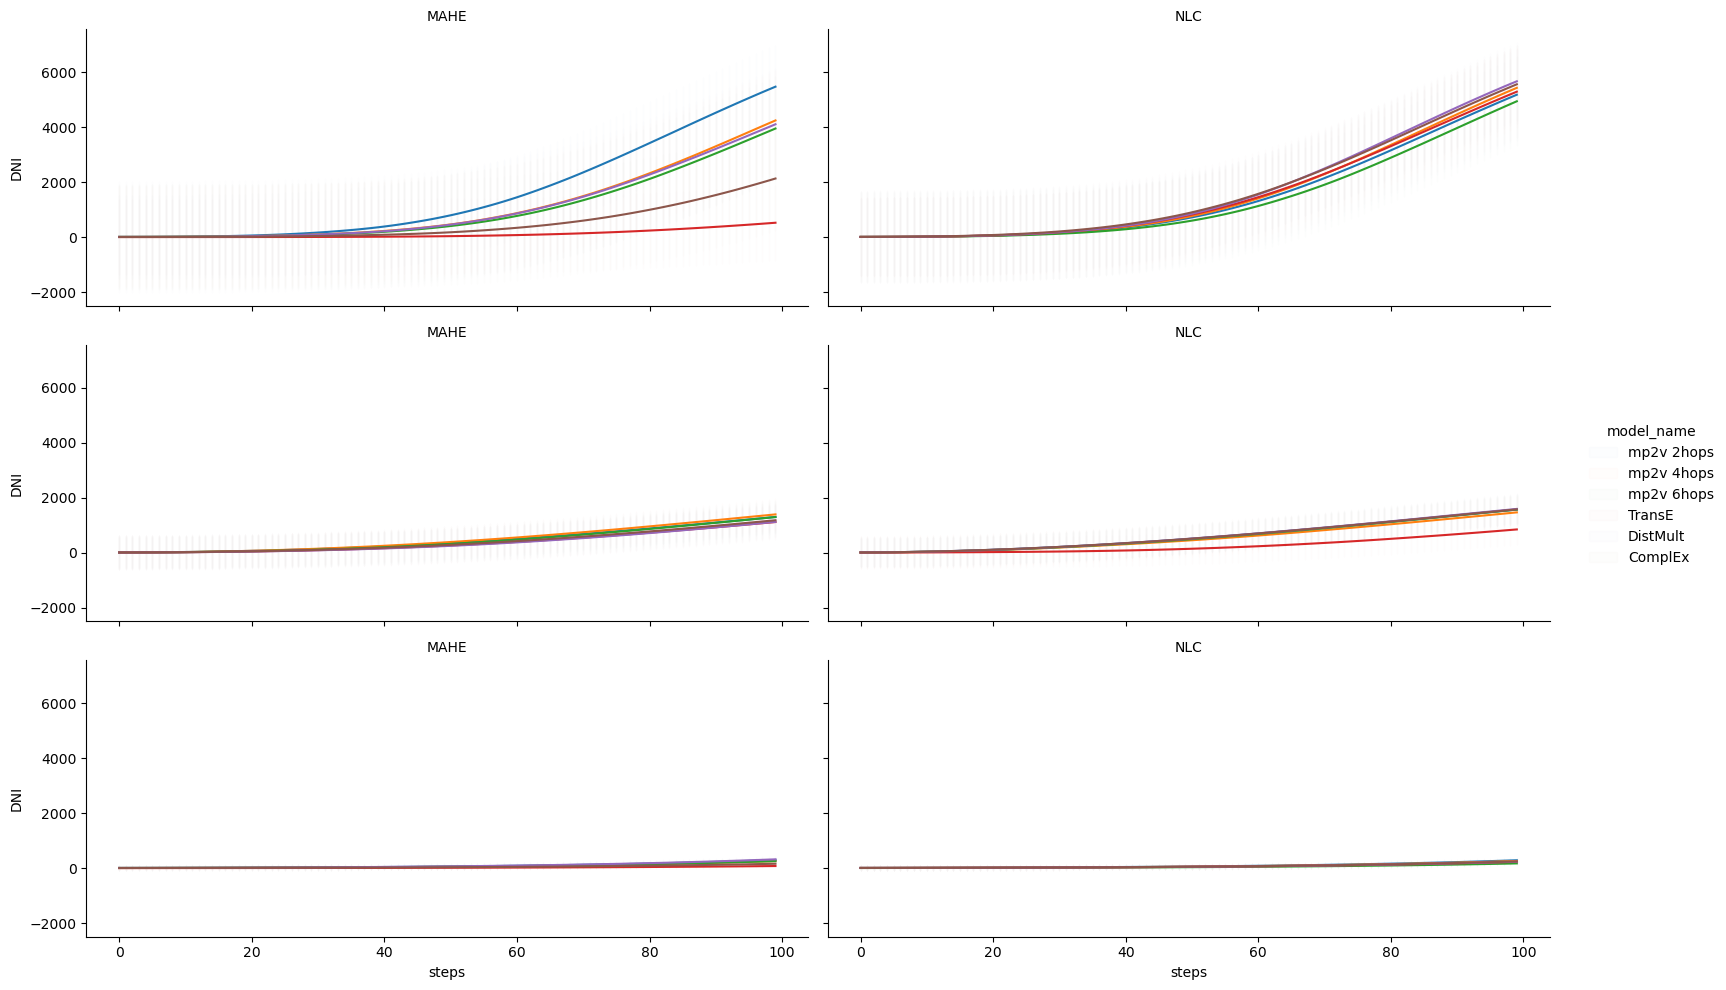

In [ ]:
# Save the DataFrame to a CSV file
sims_df.to_csv(f"results/facets/{timestamp}_sims.csv", index=False)

# Explode the 'sims' and 'steps' columns to create a long-form DataFrame
exploded_sims_df = sims_df.explode(['DNI', 'steps']).reset_index()
exploded_sims_df['DNI'] = exploded_sims_df['DNI'].astype(float)
exploded_sims_df['steps'] = exploded_sims_df['steps'].astype(int)

with sns.plotting_context(font_scale=20):
    g = sns.FacetGrid(
        exploded_sims_df,
        row='base_name', col='measure_name', hue='model_name'
    )
    g.fig.set_figwidth(16)
    g.fig.set_figheight(10)
    g.map(plt.plot, 'steps', 'DNI')
    
    def custom_fill_between(data, **kwargs):
        for _, row in data.iterrows():
            # Use the 'index' column to map back to the original sims_df
            original_index = row['index']
            plt.fill_between(
                [row['steps']], 
                [row['DNI'] - sims_df.loc[original_index, 'std_sims']], 
                [row['DNI'] + sims_df.loc[original_index, 'std_sims']], 
                alpha=scatter_alpha, **kwargs
            )
    
    g.map_dataframe(custom_fill_between)
    g.add_legend()
    g.fig.subplots_adjust(right=.9)
    g.set_titles(template="{col_name}")
    # g.savefig(f"results/facets/{timestamp}_facet_line_plot.png")


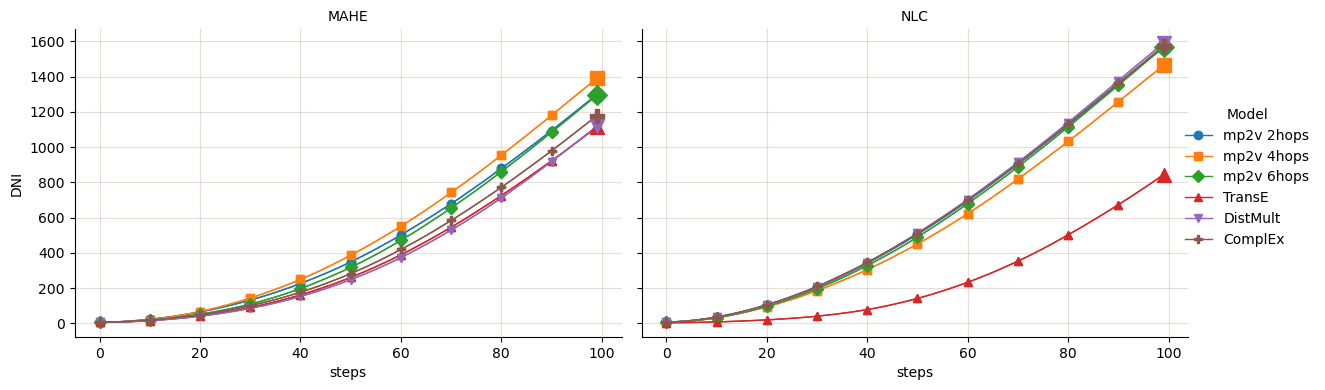

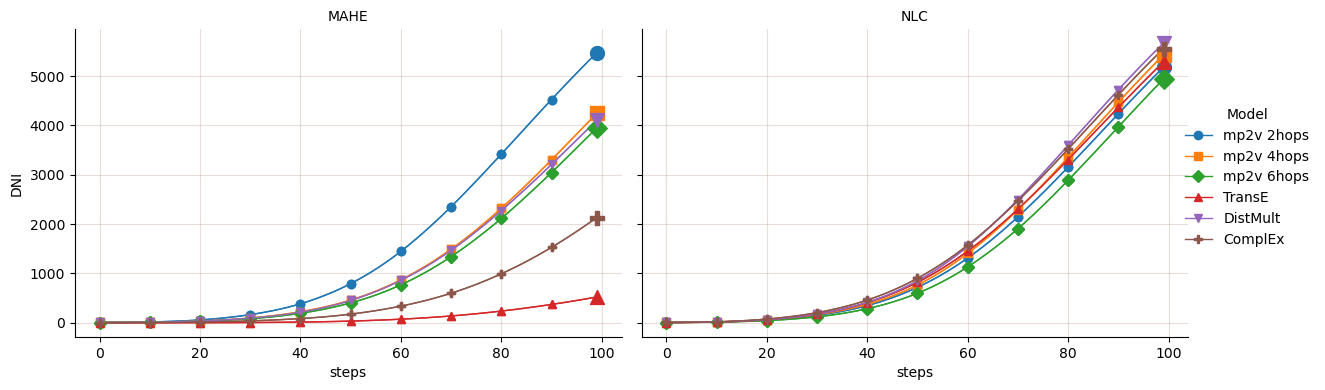

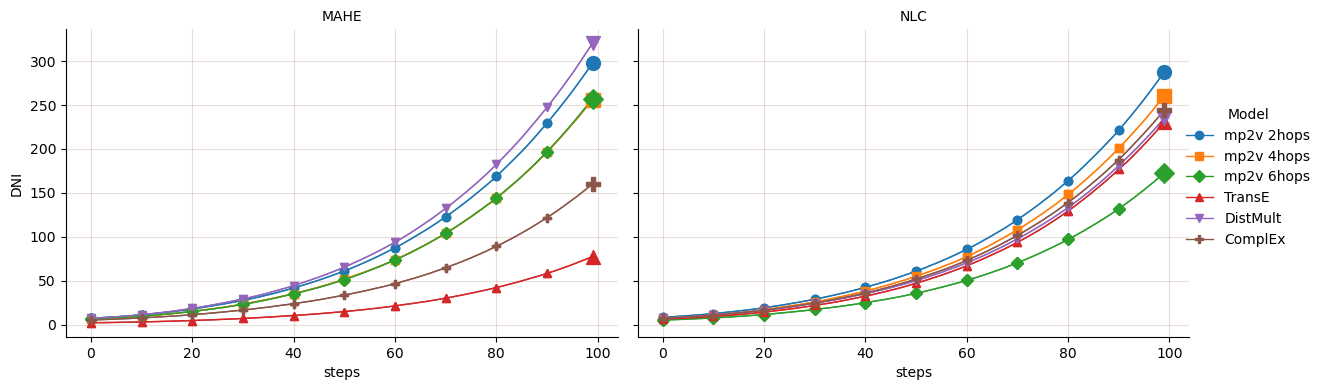

In [ ]:
markers = ['o', 's', 'D', '^', 'v', 'P']  # Define markers for each model
model_markers = {model: markers[i % len(markers)] for i, model in enumerate(exploded_sims_df['model_name'].unique())}

for base_name, group in exploded_sims_df.groupby('base_name'):
    with sns.plotting_context(font_scale=50):
        g = sns.FacetGrid(
            group,
            col='measure_name', hue='model_name'
        )
        g.fig.set_figwidth(12)
        g.fig.set_figheight(4)
        g.map(
            lambda x, y, **kwargs: plt.plot(
            x, y, marker=model_markers[kwargs['label']], 
            markevery=10, linewidth=1, **kwargs
            ),
            'steps', 'DNI'
        )
        g.map(
            lambda x, y, **kwargs: plt.plot(
            x, y, marker=model_markers[kwargs['label']], 
            markevery=10, linewidth=1, **kwargs
            ),
            'steps', 'DNI'
        )
        g.map(
            lambda x, y, **kwargs: plt.scatter(
            [x.iloc[-1]], [y.iloc[-1]], color=kwargs['color'], 
            marker=model_markers[kwargs['label']], s=100, zorder=5
            ),
            'steps', 'DNI'
        )
        g.map(plt.grid, axis='both', alpha=.2)

        # Add a custom legend with the unique values of the hue parameter
        handles, labels = g.axes.flat[0].get_legend_handles_labels()
        g.add_legend(
            title="Model", 
            loc="upper right", 
            bbox_to_anchor=(1.0, 0.75), 
            handles=handles[:6], 
            labels=labels[:6]  # Adjust the number of handles and labels as needed
        )
        g.fig.subplots_adjust(right=.9)
        g.set_titles(template="{col_name}")
        g.savefig(f"results/facets/{timestamp}_facet_line_plot_{base_name}.png")
